## **Préparation**
On va utiliser la regression lineaire pour prédire le prix d'une maison en fonction de ses caractéristiques

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv('USA_Housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
df.info()  # pour voir le nombre de colonnes et de rows (=entries=records), et le type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [6]:
df.describe()  # count, moyenne, min, max, ...

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [7]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

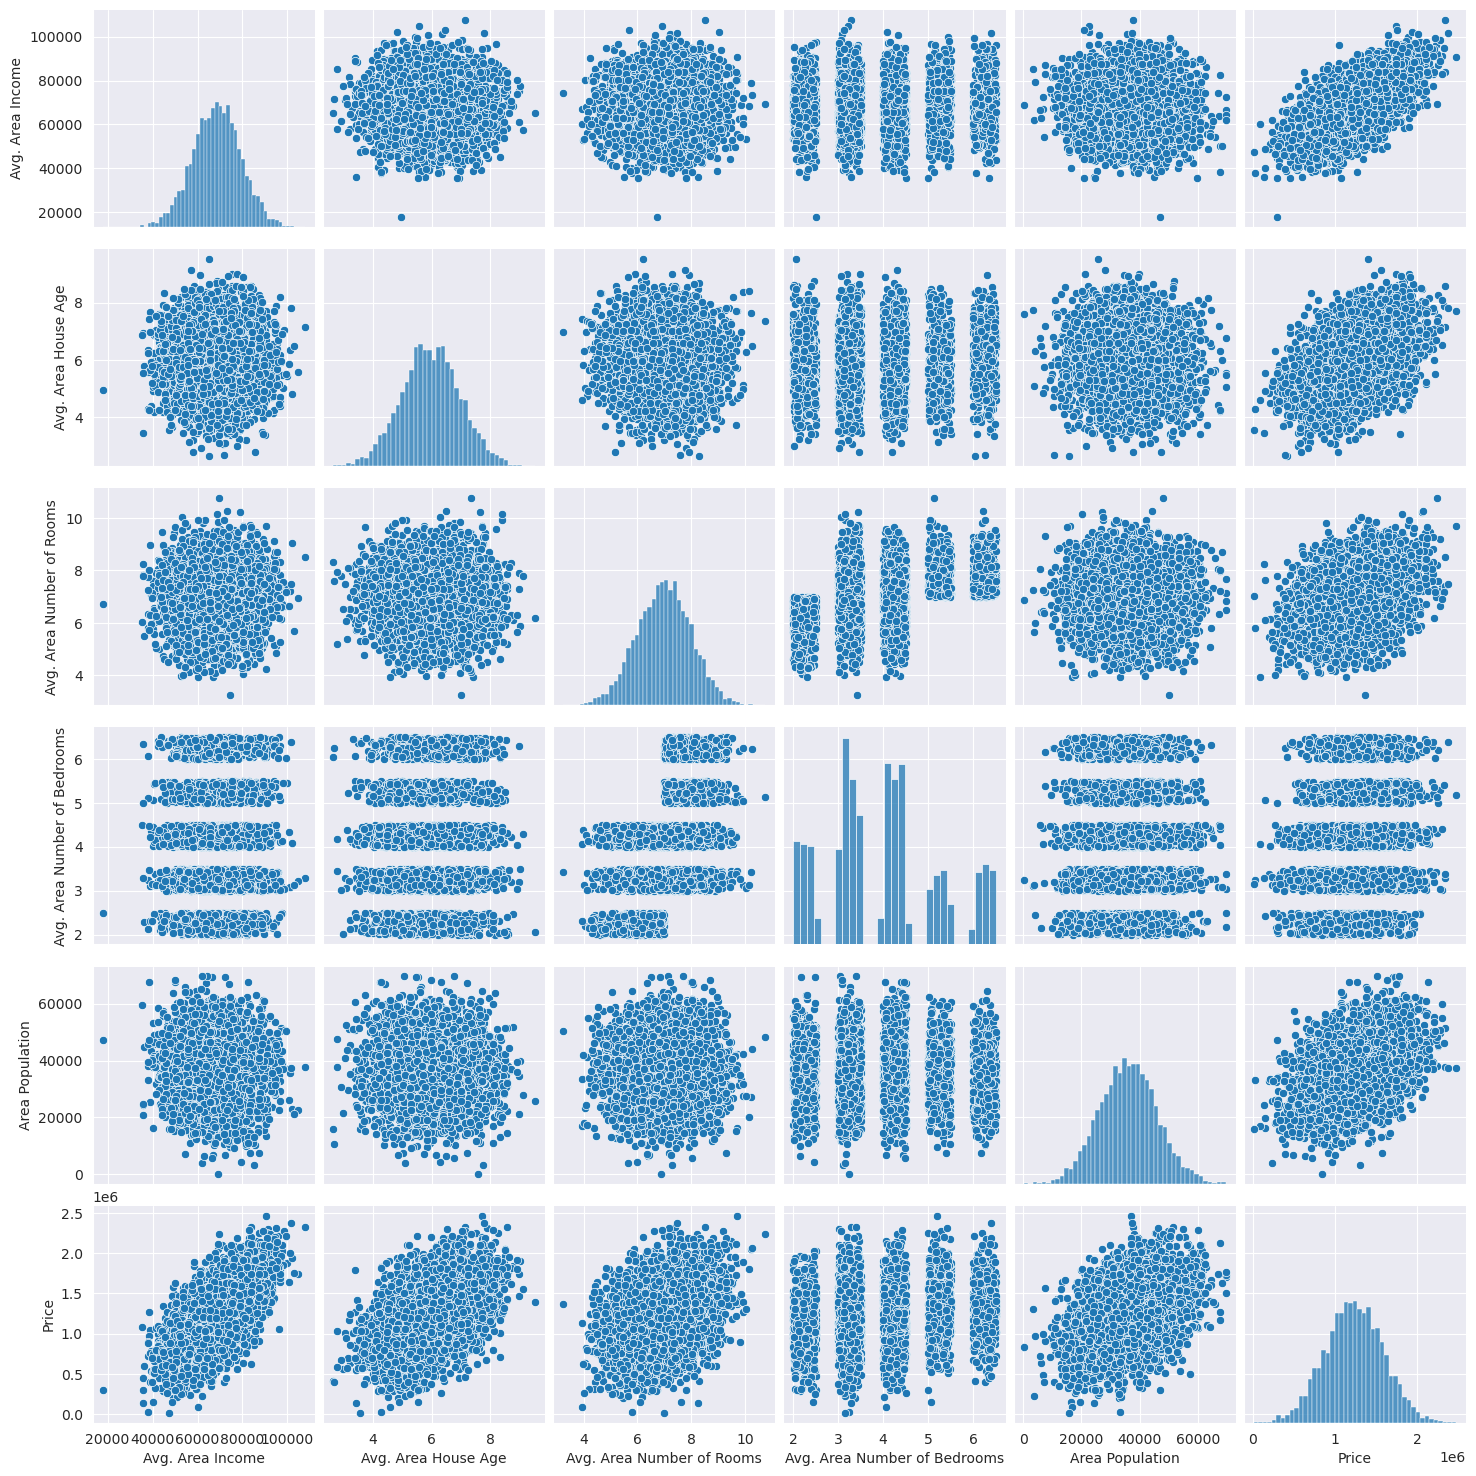

In [8]:
sns.pairplot(df)
plt.show()

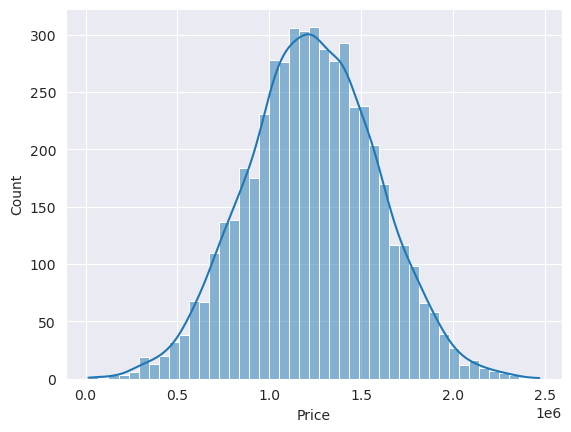

In [9]:
sns.histplot(df['Price'], kde=True)  # on affiche l'histogramme de la colonne Price
plt.show()

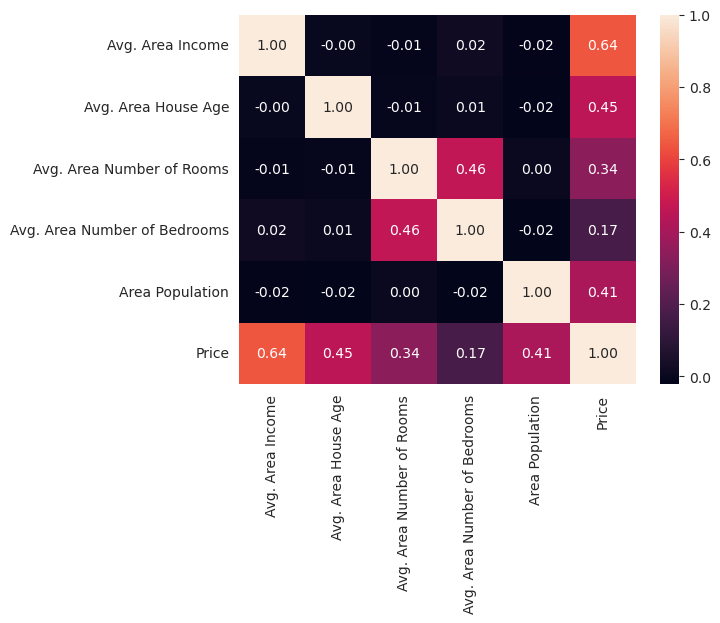

In [10]:
numeric_df = df.select_dtypes(include=[np.number])  # Sélectionner uniquement les colonnes numériques

correlation_matrix = numeric_df.corr()

sns.heatmap(correlation_matrix, annot=True, fmt=".2f")  # Afficher la matrice de corrélation
plt.show()

In [11]:
# Nos features vont être le noms des colonnes, nos labels la valeur correspondante
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [12]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
        'Avg. Area Number of Bedrooms', 'Area Population']]
print(X)

      Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0         79545.458574             5.682861                   7.009188   
1         79248.642455             6.002900                   6.730821   
2         61287.067179             5.865890                   8.512727   
3         63345.240046             7.188236                   5.586729   
4         59982.197226             5.040555                   7.839388   
...                ...                  ...                        ...   
4995      60567.944140             7.830362                   6.137356   
4996      78491.275435             6.999135                   6.576763   
4997      63390.686886             7.250591                   4.805081   
4998      68001.331235             5.534388                   7.130144   
4999      65510.581804             5.992305                   6.792336   

      Avg. Area Number of Bedrooms  Area Population  
0                             4.09     23086.800503  
1  

In [13]:
y = df['Price']
print(y)

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64


In [14]:
# On va commencer par split notre dataset en X_train et X_test pour les valeurs, et Y_train et Y_test pour les labels
# Pour cela sklearn nous donne accès à train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [15]:
print(X_train)

      Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
2654      86690.873301             6.259901                   6.676265   
2468      59866.947700             5.870330                   5.899076   
290       74372.138452             6.562380                   8.184511   
1463      61370.323490             6.529605                   6.606744   
4508      52652.652336             5.688943                   7.217268   
...                ...                  ...                        ...   
4171      56610.642563             4.846832                   7.558137   
599       70596.850945             6.548274                   6.539986   
1361      55621.899104             3.735942                   6.868291   
1547      63044.460096             5.935261                   5.913454   
4959      75078.791516             7.644779                   8.440726   

      Avg. Area Number of Bedrooms  Area Population  
2654                          3.23     42589.624391  
246

In [16]:
print(X_test)

      Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
1718      66774.995817             5.717143                   7.795215   
2511      62184.539375             4.925758                   7.427689   
345       73643.057298             6.766853                   8.337085   
2521      61909.041438             6.228343                   6.593138   
54        72942.705059             4.786222                   7.319886   
...                ...                  ...                        ...   
3412      57311.554130             5.259292                   7.816295   
4020      76856.303857             5.507289                   6.465832   
4635      59861.632185             8.096904                   6.262021   
1700      59030.172550             6.157625                   5.300798   
790       64506.790064             6.384604                   7.551429   

      Avg. Area Number of Bedrooms  Area Population  
1718                          4.32     36788.980327  
251

In [17]:
print(y_train)

2654    1.723730e+06
2468    1.039381e+06
290     1.648247e+06
1463    8.245409e+05
4508    9.282108e+05
            ...     
4171    7.296417e+05
599     1.599479e+06
1361    1.102641e+06
1547    8.650995e+05
4959    2.108376e+06
Name: Price, Length: 3500, dtype: float64


In [18]:
print(y_test)

1718    1.251689e+06
2511    8.730483e+05
345     1.696978e+06
2521    1.063964e+06
54      9.487883e+05
            ...     
3412    7.043759e+05
4020    1.254938e+06
4635    1.434324e+06
1700    5.340775e+05
790     1.427202e+06
Name: Price, Length: 1500, dtype: float64


## **Entraînement**

In [19]:
# On va fit le model avec X_train + y_train, puis le demander de prédire y_test à partir de X_test
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [20]:
print(model.intercept_)

-2641372.6673012283


In [21]:
print(model.coef_)

[2.16176350e+01 1.65221120e+05 1.21405377e+05 1.31871878e+03
 1.52251955e+01]


In [22]:
X_train.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

In [23]:
# coef = 1 unité augmente = le prix augmente de la valeur du coefficient (ici fake data)
cdf = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
cdf

,Coefficient
Avg. Area Income,21.617635
Avg. Area House Age,165221.119872
Avg. Area Number of Rooms,121405.376596
Avg. Area Number of Bedrooms,1318.718783
Area Population,15.225196


In [24]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
print(data.feature_names)


['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [25]:
print(data.target)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [26]:
# En résumé on a :
# - récupéré notre data avec pandas.read_csv
# - on a séparé en X (feature) et y (labels)
# - on a split en test et train data
# - on a importé notre model de LinearRegression
# - on a entraîné le model
# - puis on a analysé les coefficients

## **Prédictions**
Comparons les predictions de notre model à partir de X_test avec les vraies valeurs y_test

In [27]:
predictions = model.predict(X_test)

In [28]:
predictions

array([1258934.8950529 ,  822694.63411047, 1742214.39530118, ...,
       1452640.96473335,  645797.13026318, 1364943.76221892])

In [29]:
y_test

1718    1.251689e+06
2511    8.730483e+05
345     1.696978e+06
2521    1.063964e+06
54      9.487883e+05
            ...     
3412    7.043759e+05
4020    1.254938e+06
4635    1.434324e+06
1700    5.340775e+05
790     1.427202e+06
Name: Price, Length: 1500, dtype: float64

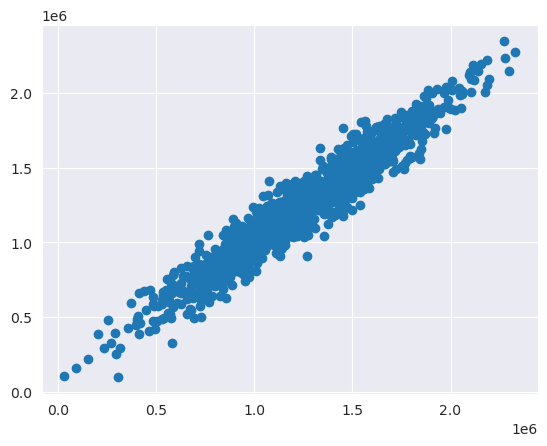

In [42]:
plt.scatter(y_test, predictions)
plt.show() # On obtient un nuage de points qui forme une ligne assez droite, donc bonnes predictions

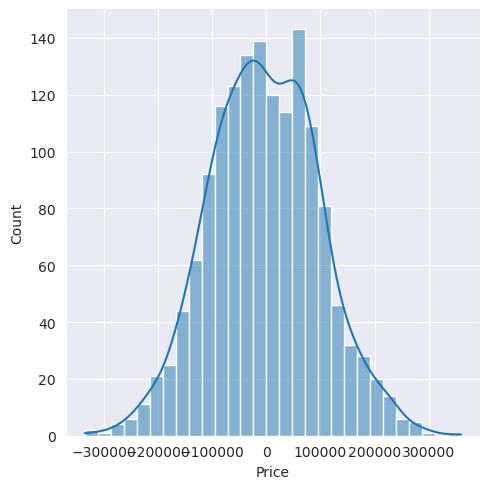

In [31]:
sns.displot((y_test - predictions), kde = True)
plt.show() # nos résultats sont normalement distribués le model était donc un bon choix. Si ce n'est pas normalement distribué alors il faut changer d'algorithme

In [32]:
# On va maintenant évaluer nos résultats à l'aide des Regression evaluation metrics, puisqu'un modèle qui prédit des valeurs c'est de la régression (vs classification pour une catégorie)
# MAE (la moyenne d'erreur, c'est le plus simple mais le plus vulnérable aux valeurs extremes)
# MSE (au carré, mais met notre unité au carré aussi)
# RMSE (le plus fiable et utilisé, combine les avantages de MAE avec ceux de MSE)
# L'idée est de minimiser les erreurs

In [33]:
from sklearn import metrics
metrics.mean_absolute_error(y_test, predictions)

81257.5579585586

In [34]:
metrics.mean_squared_error(y_test, predictions)

10169125565.897497

In [35]:
RMSE = metrics.root_mean_squared_error(y_test, predictions)

In [36]:
np.sqrt(metrics.mean_squared_error(y_test, predictions)) # C'est la même chose que .root_mean_squared_error puisque sqrt calcule la racine carrée de mean squared error, ce que fait aussi root mean squared error

100842.08231634994

In [37]:
# Sur une moyenne d'1,2M$ le modèle voit juste à +/- 100k$, 10%, c'est acceptable

In [38]:
average_price = df['Price'].mean()
print(average_price)

1232072.654142357


In [39]:
# Calcul du rapport RMSE/prix moyen pour évaluer la performance
rapport = RMSE / average_price
print(f"RMSE/Average: {rapport:.2%}")

RMSE/Average: 8.18%


In [40]:
# On obtient 8% de taux d'erreur, c'est tout à fait convenable

In [41]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions)
print(f"Coefficient R² : {r2:.4f}")

Coefficient R² : 0.9185
